In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import*
from sklearn.model_selection import train_test_split
from sklearn.metrics import*
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import category_encoders as ce
from sklearn.preprocessing import LabelEncoder

In [2]:
df = pd.read_csv("Mall_Customers.csv")  # Update the file path accordingly
print(df.head())  # Display the first few rows
print(df.shape)   # Check dataset size


   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40
(200, 5)


In [3]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [4]:
df.rename(columns={'Annual Income (k$)': 'Annual_income', 
                   'Spending Score (1-100)': 'Spending_score'}, inplace=True)

In [5]:
print(df.isna().sum())

CustomerID        0
Gender            0
Age               0
Annual_income     0
Spending_score    0
dtype: int64


In [7]:
le=LabelEncoder()
le.fit_transform(df['Gender'])

array([1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 1])

In [8]:
df=df.drop(['CustomerID'], axis=1)
df.head()

Gender  Age  Annual_income  Spending_score
0       1   19             15              39
1       1   21             15              81
2       0   20             16               6
3       0   23             16              77
4       0   31             17              40

In [9]:
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

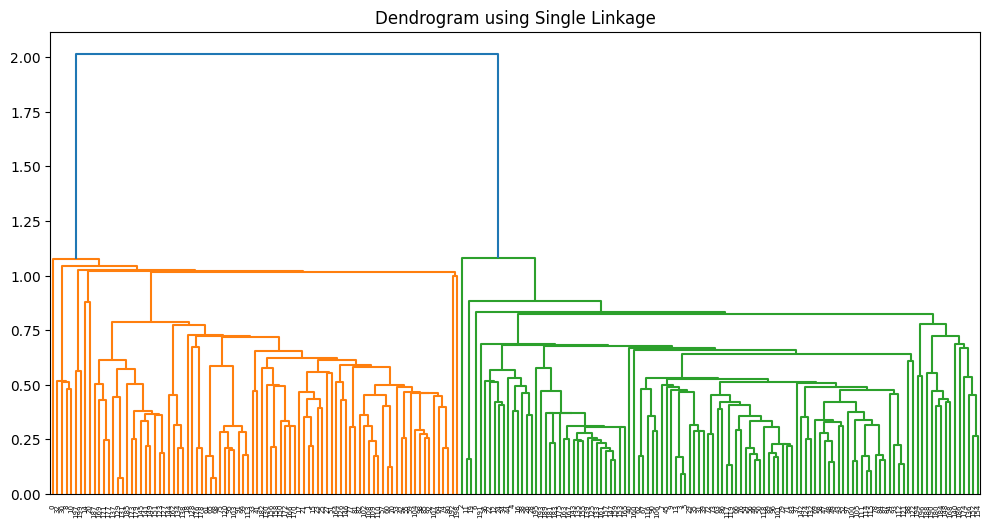

In [24]:
plt.figure(figsize=(12, 6))
mergings = linkage(df_scaled, method="single", metric='euclidean')
dendrogram(mergings)
plt.title("Dendrogram using Single Linkage")
plt.show()

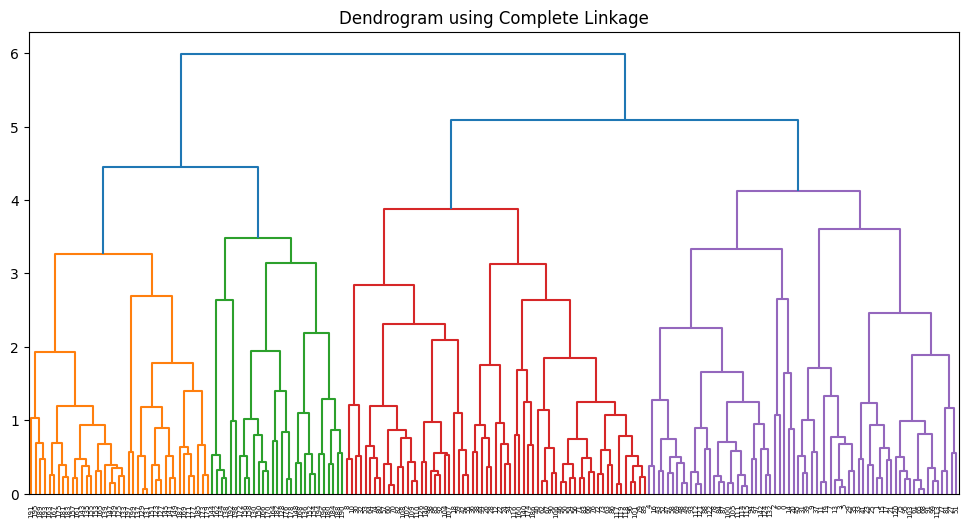

In [25]:
plt.figure(figsize=(12, 6))
mergings = linkage(df_scaled, method="complete", metric='euclidean')
dendrogram(mergings)
plt.title("Dendrogram using Complete Linkage")
plt.show()


In [26]:
cluster_labels = cut_tree(mergings, n_clusters=2).reshape(-1, )
df['Cluster_Labels'] = cluster_labels
print(df.head())  # Check the assigned clusters

   Gender  Age  Annual_income  Spending_score  Cluster_Labels
0       1   19             15              39               0
1       1   21             15              81               0
2       0   20             16               6               0
3       0   23             16              77               0
4       0   31             17              40               0


C:\Users\hom\AppData\Local\Temp\ipykernel_6244\494931288.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y=col, x='Cluster_Labels', data=df, palette='viridis')


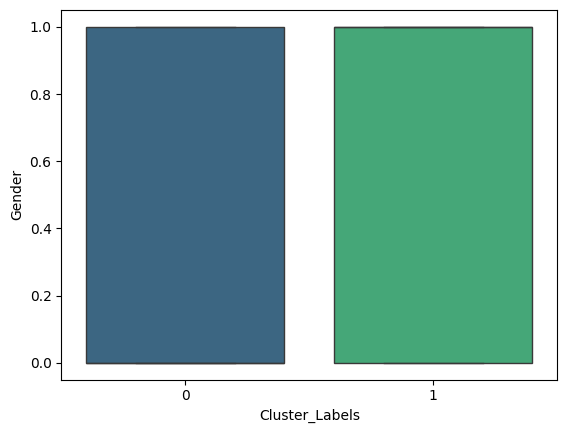

C:\Users\hom\AppData\Local\Temp\ipykernel_6244\494931288.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y=col, x='Cluster_Labels', data=df, palette='viridis')


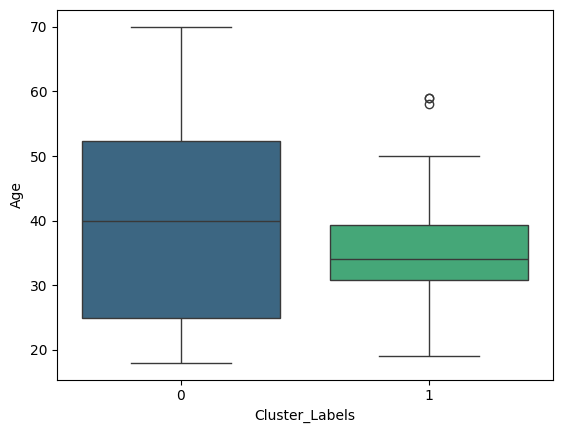

C:\Users\hom\AppData\Local\Temp\ipykernel_6244\494931288.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y=col, x='Cluster_Labels', data=df, palette='viridis')


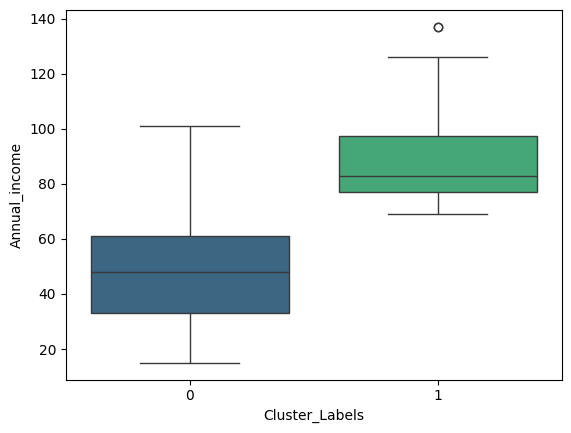

C:\Users\hom\AppData\Local\Temp\ipykernel_6244\494931288.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y=col, x='Cluster_Labels', data=df, palette='viridis')


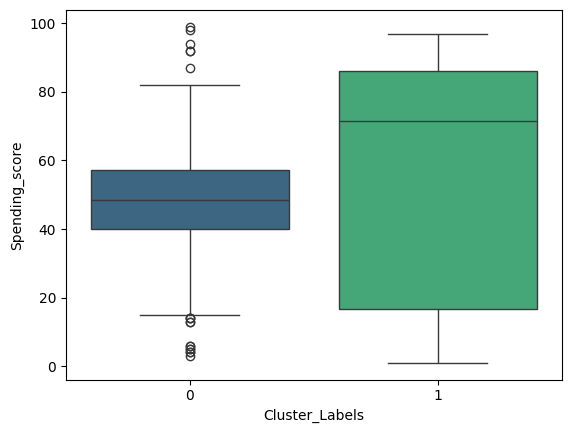

In [28]:
for col in df.columns[:-1]:  # Exclude cluster label column
    sns.boxplot(y=col, x='Cluster_Labels', data=df, palette='viridis')
    plt.show()

In [29]:
print(df.groupby('Cluster_Labels').mean())

                  Gender        Age  Annual_income  Spending_score
Cluster_Labels                                                    
0               0.393939  40.500000      46.515152       48.333333
1               0.529412  35.647059      87.823529       53.823529
